<a href="https://colab.research.google.com/github/edypj/DataPrediction/blob/main/DataWindowingforTimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
uploaded = files.upload()

Saving InformatikaUPR.xlsx to InformatikaUPR.xlsx


In [107]:
df = pd.read_excel('InformatikaUPR.xlsx')

In [6]:
print(df.head())

   No.                     Nama           NIM  Tahun Lulus  TAHUN MASUK   JK  \
0    1                 Oktafiani  DBC 113 003         2020         2013  NaN   
1    2               Zainul Azim  DBC 115 084         2020         2015  NaN   
2    3                  Martalia  DBC 115 017         2020         2015  NaN   
3    4          Andrian Darmawan  DBC 113 051         2020         2013  NaN   
4    5  Febry Aster Yansen Basah  DBC 112 091         2020         2012  NaN   

   IPS 1  SKS 1  IPS 2  SKS 2 IPS 3  SKS 3  IPS 4  SKS 4   IPK ASAL SEKOLAH  \
0   2.92   24.0   3.25   18.0  3.19   24.0   2.78   20.0  3.00          NaN   
1   3.02   24.0   3.52   22.0  3.13   24.0   3.14   21.0  3.20          NaN   
2   2.65   22.0   3.10   20.0  2.63   21.0   3.07   18.0  2.84          NaN   
3   2.19   18.0   1.03    5.0     2    9.0   2.33   12.0  2.05          NaN   
4   2.77   24.0   3.02   22.0  3.14   21.0   2.93   21.0  2.96          NaN   

  BEASISWA  UKT PEKERJAAN AYAH PEKERJAAN IBU

In [22]:
print(df.dtypes)

No.                 int64
Nama               object
NIM                object
Tahun Lulus         int64
TAHUN MASUK         int64
JK                 object
IPS 1             float64
SKS 1             float64
IPS 2             float64
SKS 2             float64
IPS 3              object
SKS 3             float64
IPS 4             float64
SKS 4             float64
IPK               float64
ASAL SEKOLAH       object
BEASISWA           object
UKT               float64
PEKERJAAN AYAH     object
PEKERJAAN IBU      object
Durasi Studi        int64
dtype: object


In [23]:
selected_columns = ['Tahun Lulus','TAHUN MASUK', 'IPS 1', 'SKS 1', 'IPS 2', 'SKS 2', 'IPS 3', 'SKS 3', 'IPS 4', 'SKS 4', 'IPK']
df_selected = df[selected_columns]

# Menampilkan hasil
print(df_selected)


     Tahun Lulus  TAHUN MASUK  IPS 1  SKS 1  IPS 2  SKS 2 IPS 3  SKS 3  IPS 4  \
0           2020         2013   2.92   24.0   3.25   18.0  3.19   24.0   2.78   
1           2020         2015   3.02   24.0   3.52   22.0  3.13   24.0   3.14   
2           2020         2015   2.65   22.0   3.10   20.0  2.63   21.0   3.07   
3           2020         2013   2.19   18.0   1.03    5.0     2    9.0   2.33   
4           2020         2012   2.77   24.0   3.02   22.0  3.14   21.0   2.93   
..           ...          ...    ...    ...    ...    ...   ...    ...    ...   
189         2021         2014   2.46   24.0   3.25   18.0  3.19   24.0   3.07   
190         2021         2014   2.96   24.0   2.90   20.0  3.21   21.0   2.83   
191         2022         2018   2.98   24.0   3.55   20.0  3.50   23.0   3.73   
192         2023         2017    NaN    NaN    NaN    NaN   NaN    NaN    NaN   
193         2022         2018   3.79   24.0   3.75   22.0  3.54   23.0   3.59   

     SKS 4   IPK  
0     20

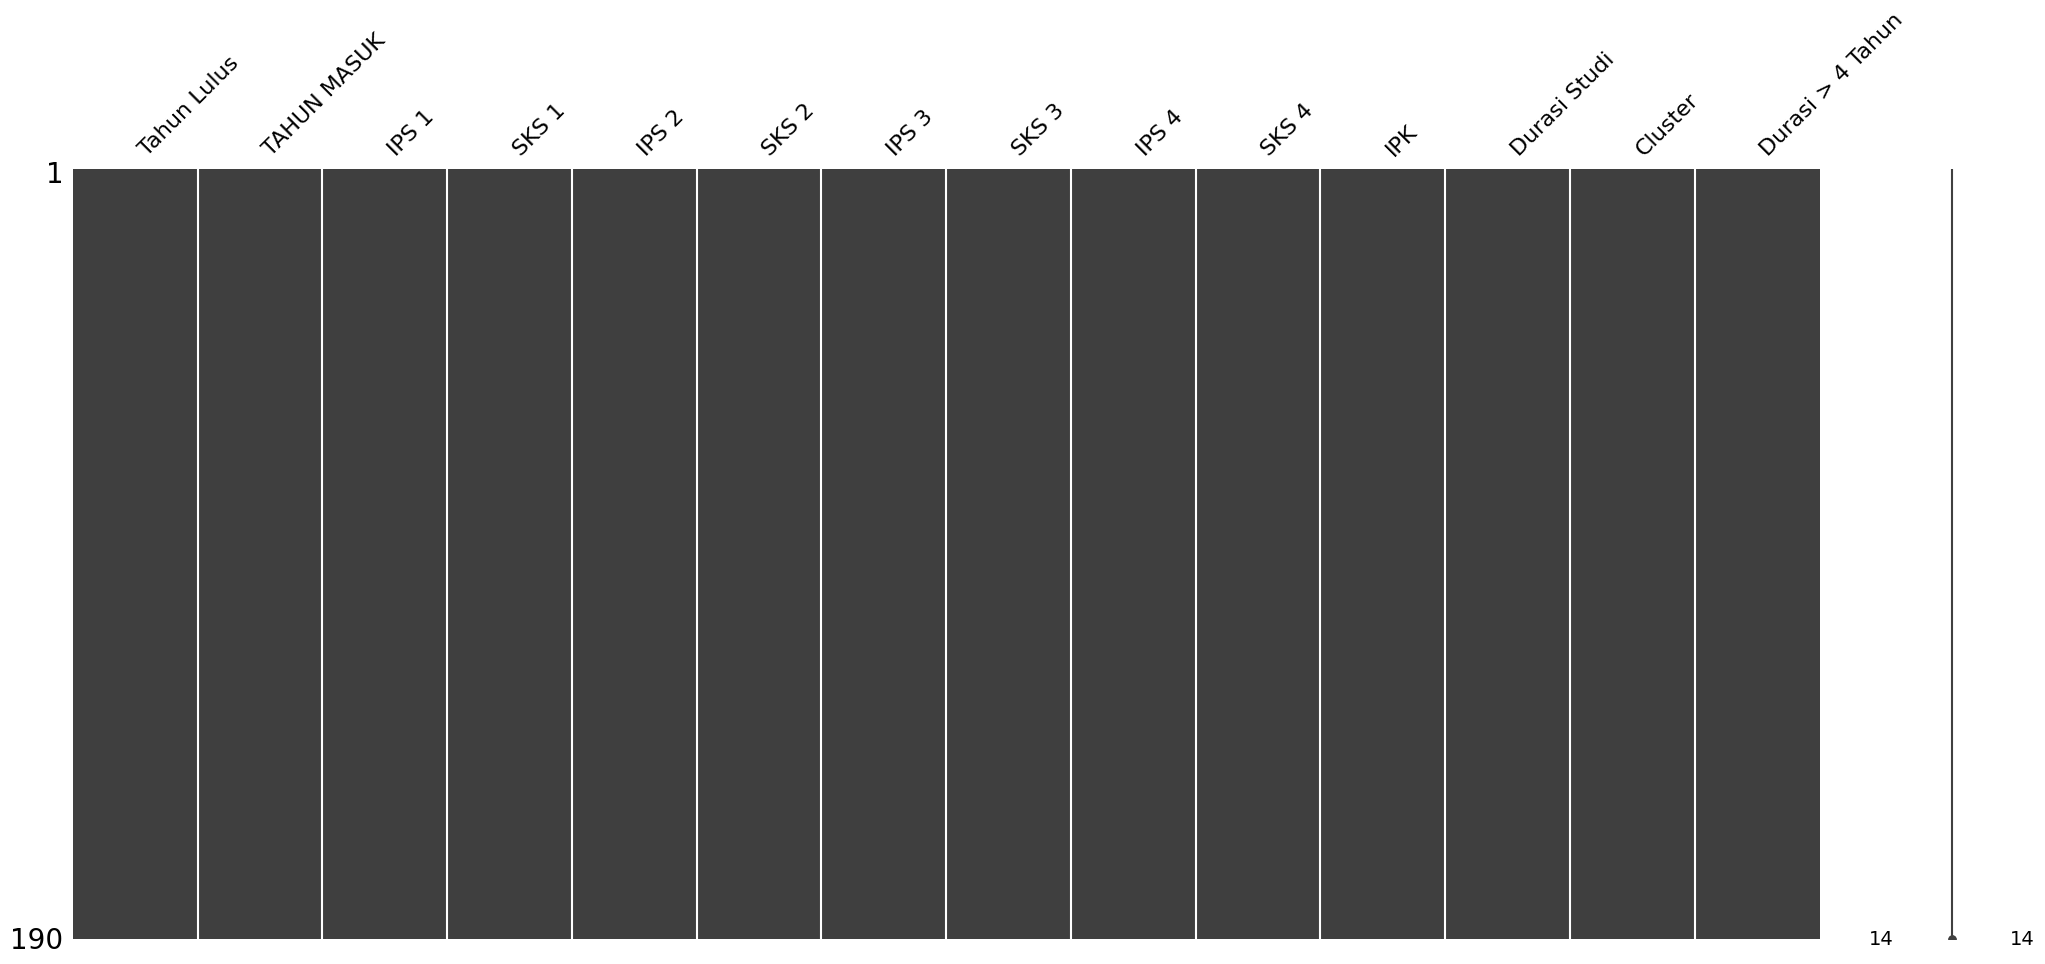

In [153]:
import matplotlib.pyplot as plt
import missingno as msno

# Visualisasi matriks nilai yang hilang
msno.matrix(df_selected)
plt.show()

In [27]:
# Assuming df_selected is your DataFrame
for column in df_selected.columns:
    if df_selected[column].isnull().sum() > 0:  # Check if the column has missing values
        missing_indices = df_selected[df_selected[column].isnull()].index
        df_selected[column] = pd.to_numeric(df_selected[column], errors='coerce')  # Convert values to numeric type
        mean = df_selected[column].mean()
        std = df_selected[column].std()
        random_values = np.random.normal(mean, std, len(missing_indices))  # Generate random values from normal distribution
        df_selected.loc[missing_indices, column] = random_values  # Replace missing values with random values

# Menampilkan hasil setelah imputasi
print("Data setelah imputasi acak:")
print(df_selected)


Data setelah imputasi acak:
     Tahun Lulus  TAHUN MASUK     IPS 1      SKS 1     IPS 2      SKS 2  \
0           2020         2013  2.920000  24.000000  3.250000  18.000000   
1           2020         2015  3.020000  24.000000  3.520000  22.000000   
2           2020         2015  2.650000  22.000000  3.100000  20.000000   
3           2020         2013  2.190000  18.000000  1.030000   5.000000   
4           2020         2012  2.770000  24.000000  3.020000  22.000000   
..           ...          ...       ...        ...       ...        ...   
189         2021         2014  2.460000  24.000000  3.250000  18.000000   
190         2021         2014  2.960000  24.000000  2.900000  20.000000   
191         2022         2018  2.980000  24.000000  3.550000  20.000000   
192         2023         2017  2.749952  20.853695  3.815659  18.757512   
193         2022         2018  3.790000  24.000000  3.750000  22.000000   

        IPS 3      SKS 3     IPS 4      SKS 4       IPK  
0    3.190000

<ipython-input-27-c9d28b435352>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = pd.to_numeric(df_selected[column], errors='coerce')  # Convert values to numeric type


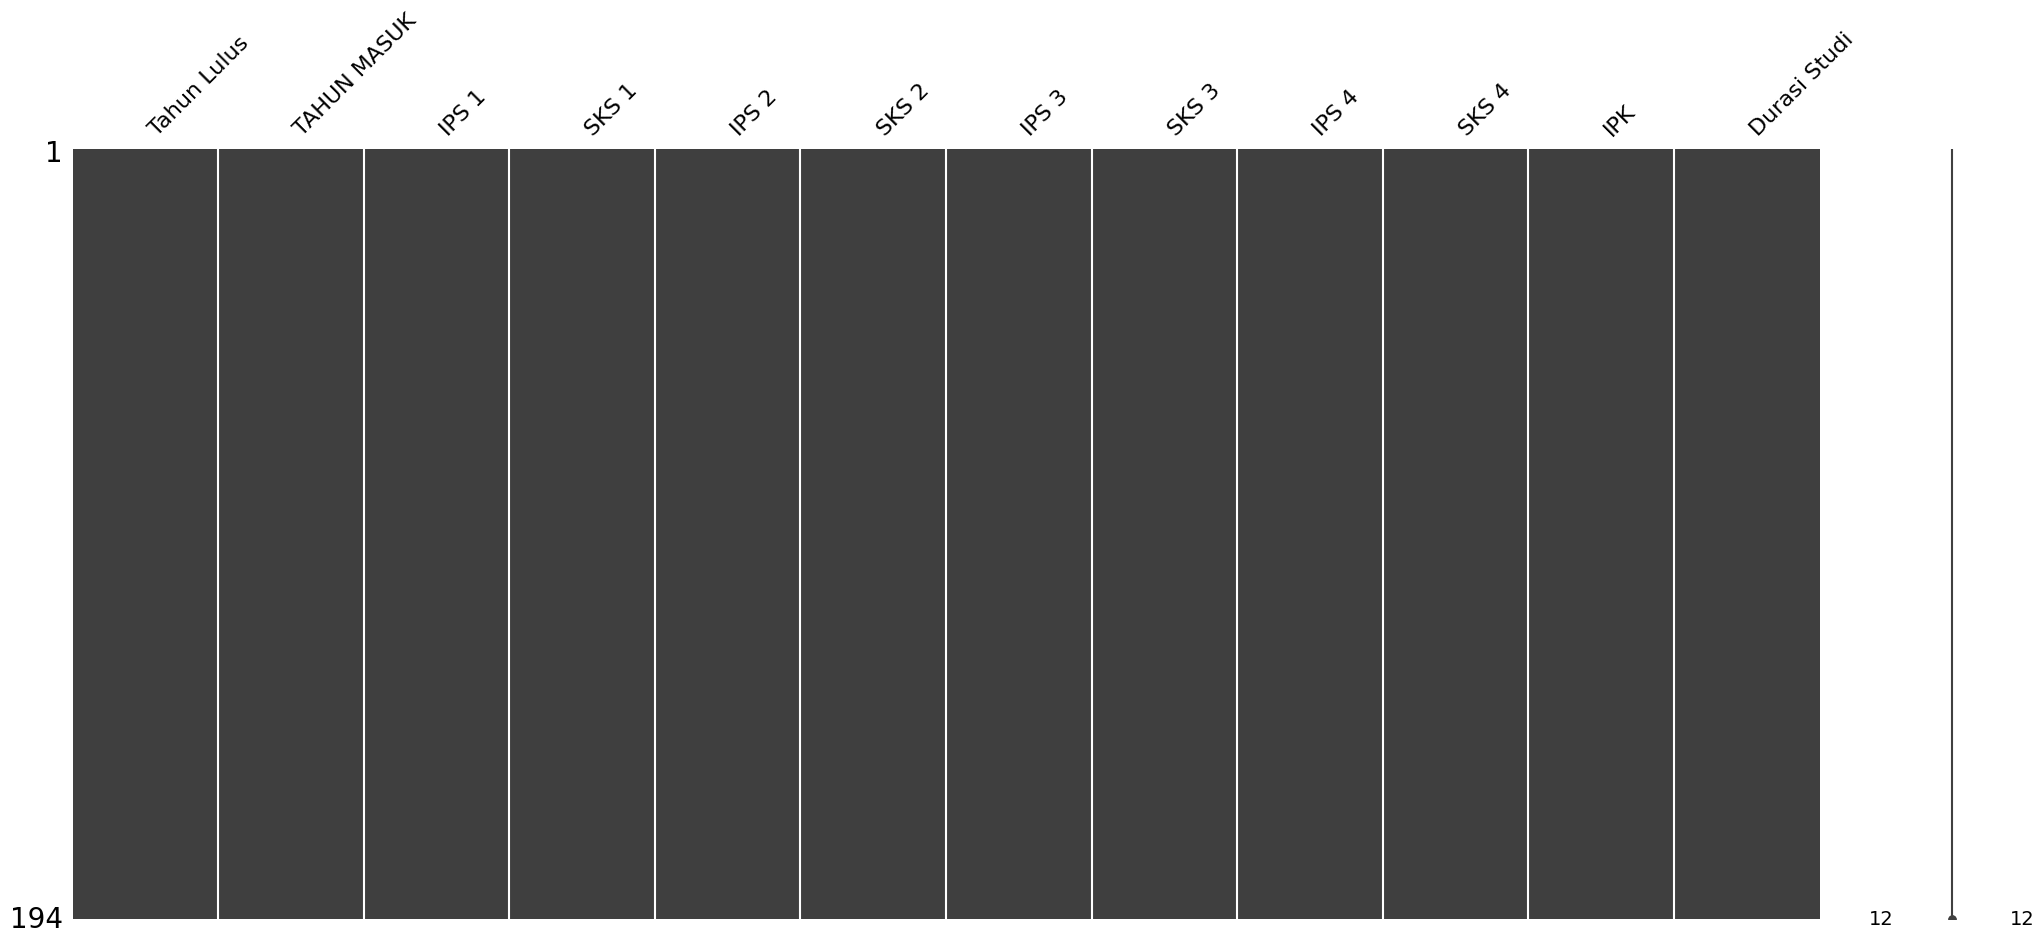

In [57]:
# Visualisasi matriks nilai yang hilang
msno.matrix(df_selected)
plt.show()

In [101]:
# Hitung durasi studi setiap mahasiswa
df['Durasi Studi'] = df['Tahun Lulus'] - df['TAHUN MASUK']

# Kelompokkan mahasiswa berdasarkan tahun lulus dan hitung jumlah mahasiswa yang lulus setiap tahun
df_lulus = df.groupby('Tahun Lulus').size().reset_index(name='Jumlah Lulus')

# Misalkan kita menggunakan jumlah mahasiswa yang masuk setiap tahun sebagai target prediksi
# Anda mungkin perlu menyesuaikan dengan data yang Anda miliki
df_masuk = df.groupby('TAHUN MASUK').size().reset_index(name='Jumlah Masuk')

future_years = 7
window_size = 5  # Periode windowing lima tahun

# Membuat array fitur X_masuk dan target y_masuk untuk model regresi linear dengan windowing
X_masuk = []
y_masuk = []

for i in range(window_size, len(df_masuk)):
    X_masuk.append(df_masuk['Jumlah Masuk'].values[i-window_size:i])
    y_masuk.append(df_masuk['Jumlah Masuk'].values[i])

X_masuk = np.array(X_masuk)
y_masuk = np.array(y_masuk)

# Membuat model regresi linear untuk jumlah mahasiswa yang masuk
model_masuk = LinearRegression()
model_masuk.fit(X_masuk, y_masuk)

# Prediksi untuk tahun-tahun berikutnya
last_year_masuk = df_masuk['TAHUN MASUK'].iloc[-1]
future_years_array_masuk = np.array([last_year_masuk + i for i in range(1, future_years+1)])
future_predictions_masuk = []

for i in range(future_years):
    X_pred_masuk = df_masuk['Jumlah Masuk'].values[-window_size:]
    prediction = model_masuk.predict(X_pred_masuk.reshape(1, -1))
    future_predictions_masuk.append(prediction[0])
    df_masuk = pd.concat([df_masuk, pd.DataFrame({'TAHUN MASUK': [future_years_array_masuk[i]], 'Jumlah Masuk': [prediction[0]]})], ignore_index=True)


# Mengubah nilai prediksi negatif menjadi nilai positif

future_predictions_masuk = [abs(prediction) for prediction in future_predictions_masuk]


# Menampilkan hasil prediksi mahasiswa yang masuk
print("Prediksi untuk jumlah mahasiswa yang masuk tahun-tahun berikutnya (setelah perubahan):")
for year, prediction in zip(future_years_array_masuk, future_predictions_masuk):
    print(f"Tahun {year}: {prediction:.0f} mahasiswa masuk")

Prediksi untuk jumlah mahasiswa yang masuk tahun-tahun berikutnya (setelah perubahan):
Tahun 2020: 35 mahasiswa masuk
Tahun 2021: 6 mahasiswa masuk
Tahun 2022: 60 mahasiswa masuk
Tahun 2023: 16 mahasiswa masuk
Tahun 2024: 82 mahasiswa masuk
Tahun 2025: 55 mahasiswa masuk
Tahun 2026: 115 mahasiswa masuk


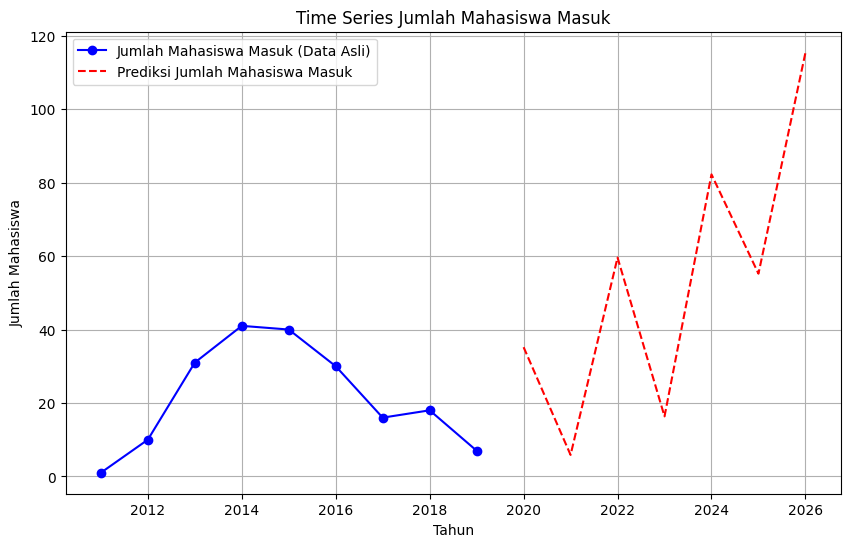

In [104]:
# Menggambarkan hasil prediksi untuk jumlah mahasiswa yang masuk
plt.figure(figsize=(10, 6))

# Data asli (hanya hingga tahun 2019)
plt.plot(df_masuk[df_masuk['TAHUN MASUK'] <= 2019]['TAHUN MASUK'], df_masuk[df_masuk['TAHUN MASUK'] <= 2019]['Jumlah Masuk'], color='blue', marker='o', label='Jumlah Mahasiswa Masuk (Data Asli)')

# Hasil prediksi
plt.plot(future_years_array_masuk, future_predictions_masuk, color='red', linestyle='--', label='Prediksi Jumlah Mahasiswa Masuk')

plt.title('Time Series Jumlah Mahasiswa Masuk')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Mahasiswa')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# Kelompokkan mahasiswa berdasarkan tahun lulus dan hitung jumlah mahasiswa yang lulus setiap tahun
df_lulus = df.groupby('Tahun Lulus').size().reset_index(name='Jumlah Lulus')

# Tampilkan data jumlah mahasiswa yang lulus
print(df_lulus)

   Tahun Lulus  Jumlah Lulus
0         2019             1
1         2020            94
2         2021            51
3         2022            30
4         2023            18


In [80]:
# Data jumlah mahasiswa yang lulus
tahun_lulus = df_lulus['Tahun Lulus'].values
jumlah_lulus = df_lulus['Jumlah Lulus'].values

# Parameter windowing
window_size = 3

# Membuat array fitur X_lulus dan target y_lulus untuk model regresi linear dengan windowing
X_lulus = []
y_lulus = []

for i in range(window_size, len(jumlah_lulus)):
    X_lulus.append(jumlah_lulus[i-window_size:i])
    y_lulus.append(jumlah_lulus[i])

X_lulus = np.array(X_lulus)
y_lulus = np.array(y_lulus)

# Membuat model regresi linear untuk jumlah mahasiswa yang lulus dengan windowing
model_lulus = LinearRegression()
model_lulus.fit(X_lulus, y_lulus)

# Prediksi untuk tahun-tahun berikutnya
future_years = 7
future_predictions_lulus = []

for i in range(future_years):
    X_pred_lulus = jumlah_lulus[-window_size:].reshape(1, -1)
    prediction = model_lulus.predict(X_pred_lulus)
    future_predictions_lulus.append(prediction[0])
    jumlah_lulus = np.append(jumlah_lulus, prediction)

# Menampilkan hasil prediksi
print("Prediksi untuk jumlah mahasiswa yang lulus tahun-tahun berikutnya:")
for year, prediction in zip(range(df_lulus['Tahun Lulus'].iloc[-1] + 1, df_lulus['Tahun Lulus'].iloc[-1] + future_years + 1), future_predictions_lulus):
    print(f"Tahun {year}: {prediction:.0f} mahasiswa lulus")

Prediksi untuk jumlah mahasiswa yang lulus tahun-tahun berikutnya:
Tahun 2024: 21 mahasiswa lulus
Tahun 2025: 23 mahasiswa lulus
Tahun 2026: 24 mahasiswa lulus
Tahun 2027: 24 mahasiswa lulus
Tahun 2028: 24 mahasiswa lulus
Tahun 2029: 24 mahasiswa lulus
Tahun 2030: 24 mahasiswa lulus


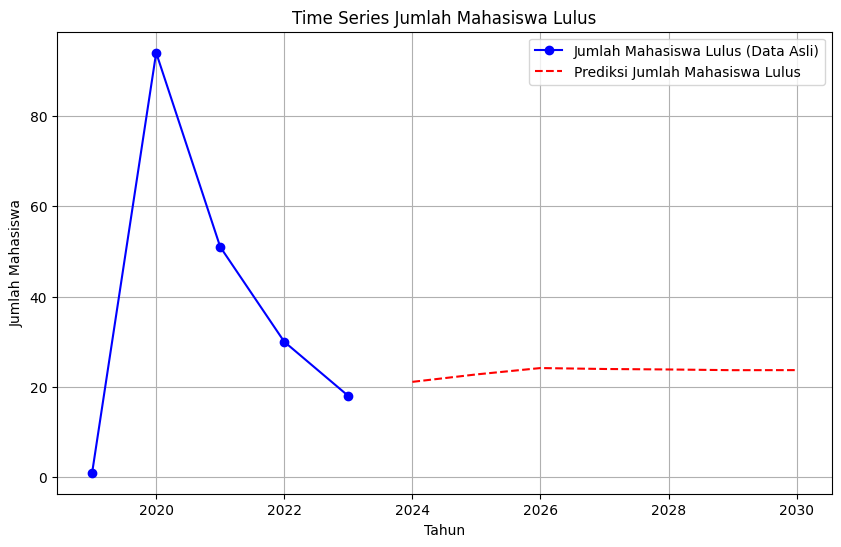

In [91]:
# Mengganti penggunaan DataFrame df_lulus dengan df_lulus
tahun_lulus = df_lulus['Tahun Lulus']
jumlah_lulus = df_lulus['Jumlah Lulus']

# Membuat plot untuk data asli dan prediksi
plt.figure(figsize=(10, 6))

# Data asli
plt.plot(tahun_lulus, jumlah_lulus, color='blue', marker='o', label='Jumlah Mahasiswa Lulus (Data Asli)')

# Hasil prediksi
plt.plot(future_years_array_lulus, future_predictions_lulus, color='red', linestyle='--', label='Prediksi Jumlah Mahasiswa Lulus')

plt.title('Time Series Jumlah Mahasiswa Lulus')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Mahasiswa')
plt.legend()
plt.grid(True)
plt.show()


# Multiple-Regresion

In [106]:
# Persiapkan data
X = df_selected[['TAHUN MASUK', 'IPS 1', 'SKS 1', 'IPS 2', 'SKS 2', 'IPS 3', 'SKS 3', 'IPS 4', 'SKS 4', 'IPK']]
y = df_selected['Tahun Lulus']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pilih model regresi linear
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Membuat fungsi untuk memprediksi tahun lulus
def predict_graduation_year(tahun_masuk, ips1, sks1, ips2, sks2, ips3, sks3, ips4, sks4, ipk):
    # Membuat dataframe dengan input yang diberikan
    input_data = pd.DataFrame({
        'TAHUN MASUK': [tahun_masuk],
        'IPS 1': [ips1],
        'SKS 1': [sks1],
        'IPS 2': [ips2],
        'SKS 2': [sks2],
        'IPS 3': [ips3],
        'SKS 3': [sks3],
        'IPS 4': [ips4],
        'SKS 4': [sks4],
        'IPK': [ipk]
    })

    # Melakukan prediksi tahun lulus
    predicted_year = model.predict(input_data)
    return predicted_year[0]

# Memasukkan nilai secara manual
tahun_masuk = int(input("Masukkan tahun masuk: "))
ips1 = float(input("Masukkan IPS semester 1: "))
sks1 = int(input("Masukkan SKS semester 1: "))
ips2 = float(input("Masukkan IPS semester 2: "))
sks2 = int(input("Masukkan SKS semester 2: "))
ips3 = float(input("Masukkan IPS semester 3: "))
sks3 = int(input("Masukkan SKS semester 3: "))
ips4 = float(input("Masukkan IPS semester 4: "))
sks4 = int(input("Masukkan SKS semester 4: "))
ipk = float(input("Masukkan IPK: "))

# Memanggil fungsi untuk memprediksi tahun lulus
predicted_graduation_year = predict_graduation_year(tahun_masuk, ips1, sks1, ips2, sks2, ips3, sks3, ips4, sks4, ipk)
print("Tahun lulus yang diprediksi:", int(predicted_graduation_year))

Masukkan tahun masuk: 2020
Masukkan IPS semester 1: 2.5
Masukkan SKS semester 1: 24
Masukkan IPS semester 2: 2.5
Masukkan SKS semester 2: 19
Masukkan IPS semester 3: 3.33
Masukkan SKS semester 3: 24
Masukkan IPS semester 4: 2.5
Masukkan SKS semester 4: 19
Masukkan IPK: 2.75
Tahun lulus yang diprediksi: 2022


# K-Means Klustering

In [110]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Koordinat centroid:
Cluster 1: SKS 1 = 16.628304408648056, IPS 1 = 2.142208085233274
Cluster 2: SKS 1 = 22.872733154749145, IPS 1 = 2.925669901279757


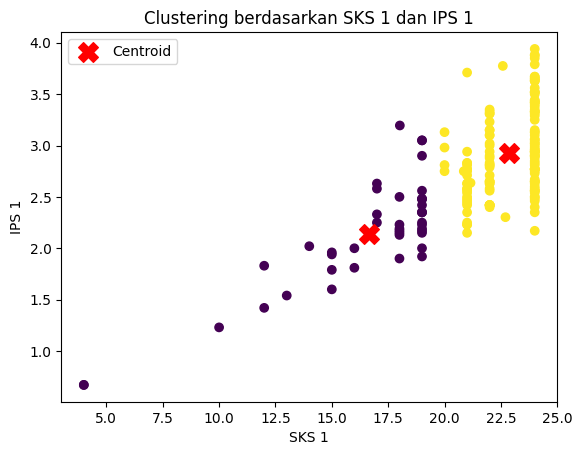

In [152]:
X = df_selected[['SKS 1', 'IPS 1']]

# Menentukan jumlah cluster (contoh: 2)
n_clusters = 2

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Mendapatkan koordinat centroid dari setiap cluster
centroids = kmeans.cluster_centers_

# Menampilkan koordinat centroid
print("Koordinat centroid:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: SKS 1 = {centroid[0]}, IPS 1 = {centroid[1]}")

# Visualisasi hasil clustering
plt.scatter(X['SKS 1'], X['IPS 1'], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroid')  # Menampilkan centroid
plt.xlabel('SKS 1')
plt.ylabel('IPS 1')
plt.title('Clustering berdasarkan SKS 1 dan IPS 1')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Koordinat centroid:
Cluster 1: SKS 2 = 14.185932198381746, IPS 2 = 2.5457971268194464
Cluster 2: SKS 2 = 20.616354621611343, IPS 2 = 3.254139652371811


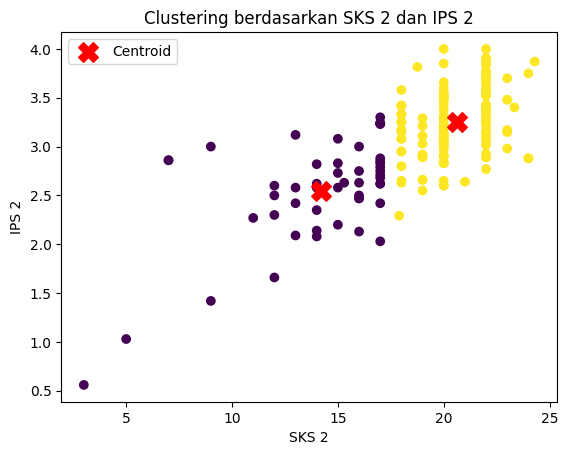

In [149]:
# Pemilihan fitur
X = df_selected[['SKS 2', 'IPS 2']]

# Menentukan jumlah cluster (contoh: 2)
n_clusters = 2

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Mendapatkan koordinat centroid dari setiap cluster
centroids = kmeans.cluster_centers_

# Menampilkan koordinat centroid
print("Koordinat centroid:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: SKS 2 = {centroid[0]}, IPS 2 = {centroid[1]}")

# Visualisasi hasil clustering
plt.scatter(X['SKS 2'], X['IPS 2'], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroid')  # Menampilkan centroid
plt.xlabel('SKS 2')
plt.ylabel('IPS 2')
plt.title('Clustering berdasarkan SKS 2 dan IPS 2')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Koordinat centroid:
Cluster 1: SKS 3 = 22.843975505991928, IPS 3 = 3.168684450015925
Cluster 2: SKS 3 = 15.747905219817497, IPS 3 = 2.5129525146104545


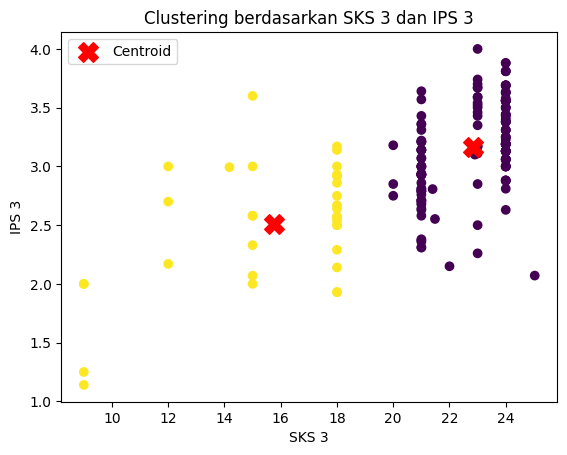

In [150]:
# Pemilihan fitur
X = df_selected[['SKS 3', 'IPS 3']]

# Menentukan jumlah cluster (contoh: 2)
n_clusters = 2

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Mendapatkan koordinat centroid dari setiap cluster
centroids = kmeans.cluster_centers_

# Menampilkan koordinat centroid
print("Koordinat centroid:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: SKS 3 = {centroid[0]}, IPS 3 = {centroid[1]}")

# Visualisasi hasil clustering
plt.scatter(X['SKS 3'], X['IPS 3'], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroid')  # Menampilkan centroid
plt.xlabel('SKS 3')
plt.ylabel('IPS 3')
plt.title('Clustering berdasarkan SKS 3 dan IPS 3')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Koordinat centroid:
Cluster 1: SKS 4 = 21.546379040225137, IPS 4 = 3.1880286651515966
Cluster 2: SKS 4 = 16.405240992917708, IPS 4 = 2.745954599870399


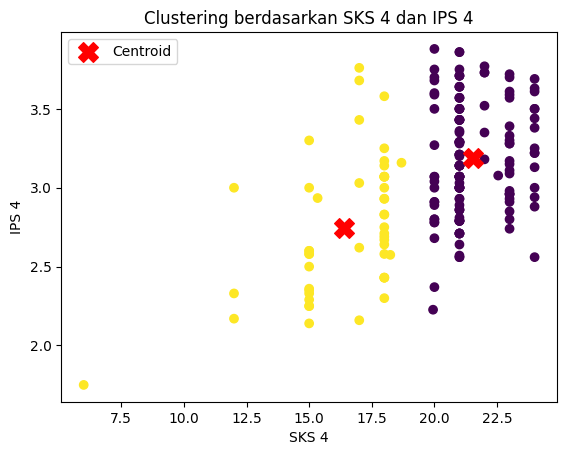

In [151]:
# Pemilihan fitur
X = df_selected[['SKS 4', 'IPS 4']]

# Menentukan jumlah cluster (contoh: 2)
n_clusters = 2

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Mendapatkan koordinat centroid dari setiap cluster
centroids = kmeans.cluster_centers_

# Menampilkan koordinat centroid
print("Koordinat centroid:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: SKS 4 = {centroid[0]}, IPS 4 = {centroid[1]}")

# Visualisasi hasil clustering
plt.scatter(X['SKS 4'], X['IPS 4'], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroid')  # Menampilkan centroid
plt.xlabel('SKS 4')
plt.ylabel('IPS 4')
plt.title('Clustering berdasarkan SKS 4 dan IPS 4')
plt.legend()
plt.show()